In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!git clone 'https://github.com/jacobgil/pytorch-grad-cam.git'

Cloning into 'pytorch-grad-cam'...
remote: Enumerating objects: 1168, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1168 (delta 39), reused 32 (delta 19), pack-reused 1098
Receiving objects: 100% (1168/1168), 109.62 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (651/651), done.


In [3]:
import sys
sys.path.append('/content/pytorch-grad-cam')
sys.path.append('/content/pytorch-grad-cam/pytorch-grad-cam')

In [4]:
import os

# Define the repository URL and the local directory where you want to clone/pull the repository
repo_url = 'https://github.com/aakashvardhan/s11-gradcam.git'
local_dir = '/content/s11-gradcam'



# Check if the local directory already exists
if not os.path.exists(local_dir):
    # Clone the repository because it does not exist
    !git clone {repo_url}
else:
    # Change directory to the local repository
    %cd {local_dir}
    # Pull the latest changes because the repository already exists
    !git pull

Cloning into 's11-gradcam'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 158 (delta 27), reused 45 (delta 17), pack-reused 100
Receiving objects: 100% (158/158), 40.62 MiB | 19.43 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [5]:
sys.path.append('/content/s11-gradcam')
sys.path.append('/content/s11-gradcam/utils')

In [6]:
from models.resnet import ResNet18
from models.model_utils import model_summary
from main import set_seeds,setup_cifar10
from utils.misclassification import show_misclassified_images, plt_misclassified_images
from utils.gradcam import display_gradcam_output
from config import get_config
import torch
config = get_config()
set_seeds()

In [7]:
_, _, _, test_loader = setup_cifar10(config)

CUDA Available? True


100%|██████████| 170498071/170498071 [00:02<00:00, 78461133.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
device = config["device"]
model = ResNet18().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
model.load_state_dict(torch.load('/content/s11-gradcam/saved_models/model_gradcam_bn.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

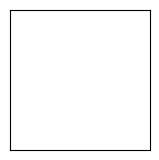

In [10]:
misclass_data = show_misclassified_images(model, test_loader, config)
plt_misclassified_images(config, misclass_data)

In [ ]:
!pip install ttach

In [ ]:
target_layers = [model.layer4[-1]]
display_gradcam_output(misclass_data,config['classes'],model,target_layers)